In [73]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [74]:
#Load the dataset 
df = pd.read_excel('dataset.xlsx')

In [75]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [76]:
df.shape

(541909, 8)

In [77]:
df.dropna(inplace=True)

In [78]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [79]:
df.shape

(406829, 8)

In [80]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [81]:
df['InvoiceNo'] = df['InvoiceNo'].astype(str)
df['StockCode'] = df['StockCode'].astype(str)
df['Description'] = df['Description'].astype(str)
df['Description'] = df['Description'].str.strip()
df['CustomerID'] = df['CustomerID'].astype(int)

In [82]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df['InvoiceNo'] = labelencoder.fit_transform(df['InvoiceNo'])

In [83]:
df.duplicated().sum()

5225

In [84]:
df.drop_duplicates(inplace=True)

In [85]:
df.duplicated().sum()

0

In [86]:
# Add new column 
df['CancelledOrder'] = df['InvoiceNo'].astype(str).str.startswith('C').astype('int')
df['InternationalOrders'] = (df['Country']!='United Kingdom').astype('int')
df['Sales'] = df['Quantity']*df['UnitPrice']

In [87]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'CancelledOrder',
       'InternationalOrders', 'Sales'],
      dtype='object')

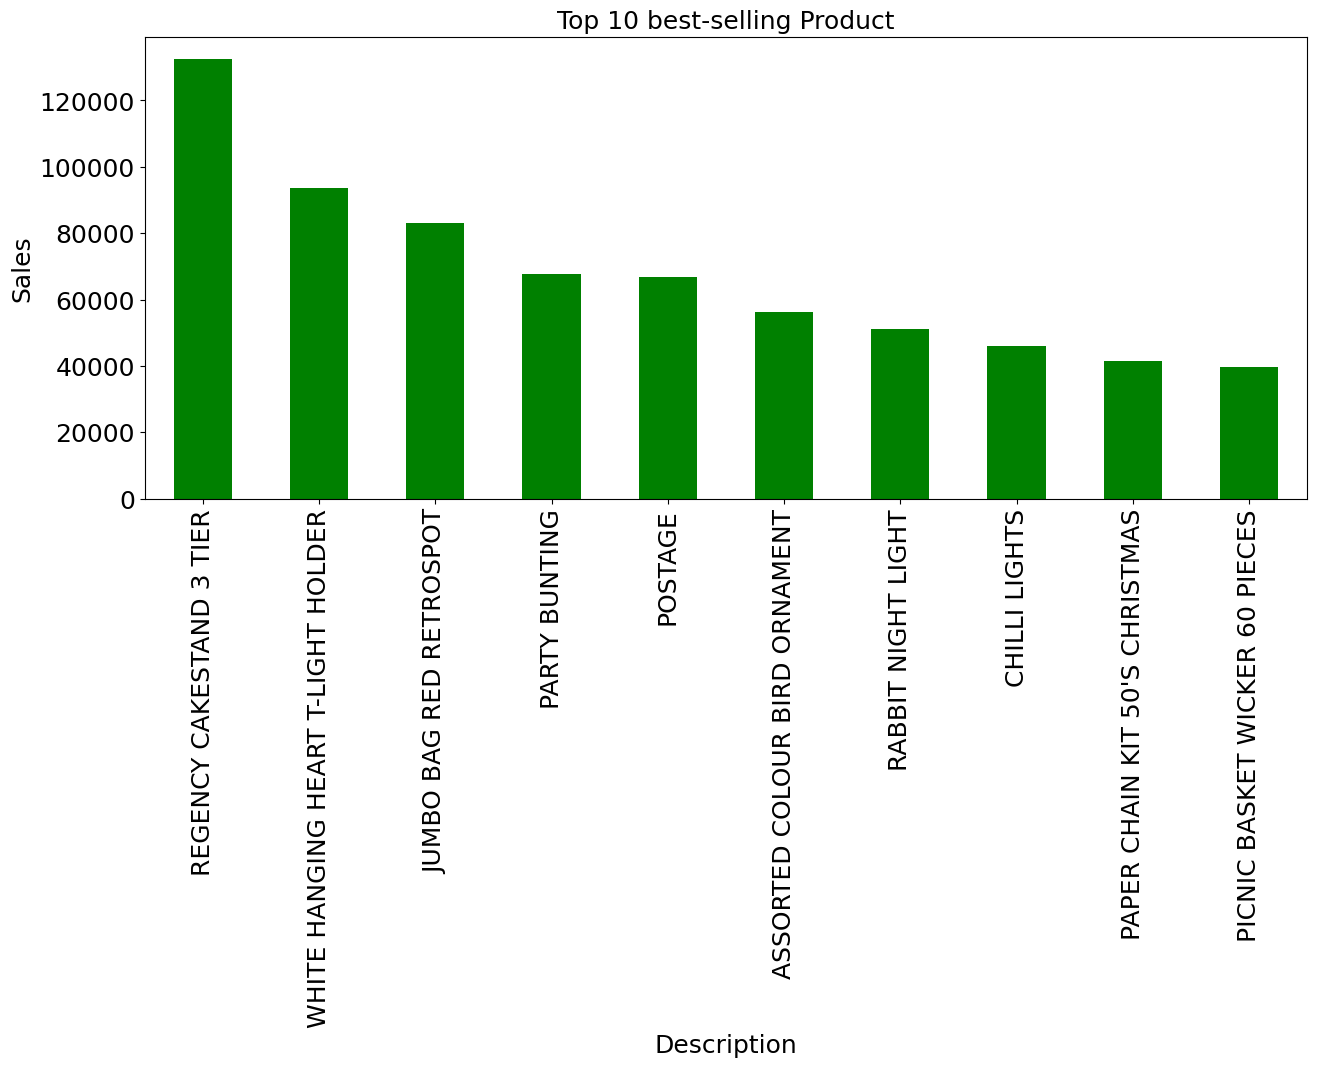

In [90]:

Top10products = df.groupby('Description',as_index=False)['Sales'].sum().sort_values('Sales',ascending=False).head(10)
ax = Top10products.plot(x="Description",y="Sales", legend=False,kind='bar',color="green",figsize= (15,6))
plt.grid(False)
plt.xlabel('Description',fontsize=18)
plt.ylabel('Sales', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Top 10 best-selling Product',fontsize = 18)
plt.show()